In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import datetime
import requests
import csv
from scipy import stats
import os
import json
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

from ipython_config import fredaccount_key as api_key

# Tiffany

In [2]:
household_debt = Path("Resources/Household_debt_to_GDP.csv")
federal_debt = Path("Resources/Total_Federal_Debt.csv")

In [3]:
household_debt_df = pd.read_csv(household_debt)

household_debt_df.head()

,DATE,HDTGPDUSQ163N
0,1/1/2005,87.157525
1,4/1/2005,89.708126
2,7/1/2005,92.393651
3,10/1/2005,94.648123
4,1/1/2006,91.952054


In [4]:
column_date = household_debt_df['DATE']

data = household_debt_df['HDTGPDUSQ163N']

household_debt_df['DATE'] = pd.to_datetime(household_debt_df['DATE'])

data

0     87.157525
1     89.708126
2     92.393651
3     94.648123
4     91.952054
        ...    
66    78.138204
67    79.834824
68    74.110958
69    75.550657
70    76.829614
Name: HDTGPDUSQ163N, Length: 71, dtype: float64

Text(0.5, 1.0, 'Household debt to GDP')

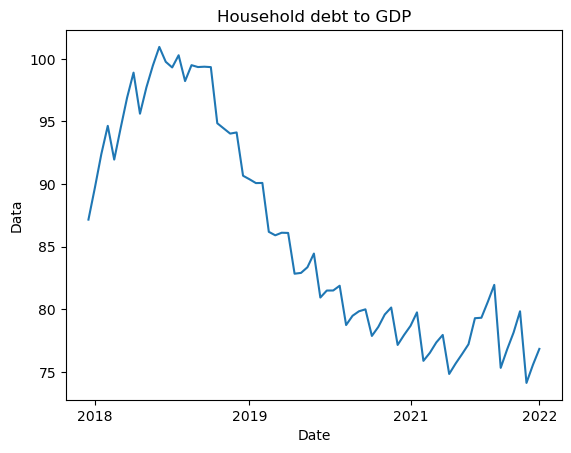

In [5]:
plt.plot(column_date, data)
plt.xticks([1, 25, 50, 70], ['2018', '2019', '2021', '2022'])
plt.xlabel('Date')
plt.ylabel('Data')
plt.title('Household debt to GDP')

In [6]:
federal_debt_df = pd.read_csv(federal_debt)
federal_debt_df.head()

,DATE,GFDEBTN
0,1/1/1966,320999
1,4/1/1966,316097
2,7/1/1966,324748
3,10/1/1966,329319
4,1/1/1967,330947


In [7]:
date_2 = federal_debt_df['DATE']

data_2 = federal_debt_df['GFDEBTN']

federal_debt_df['DATE'] = pd.to_datetime(federal_debt_df['DATE'])

data

0     87.157525
1     89.708126
2     92.393651
3     94.648123
4     91.952054
        ...    
66    78.138204
67    79.834824
68    74.110958
69    75.550657
70    76.829614
Name: HDTGPDUSQ163N, Length: 71, dtype: float64

Text(0.5, 1.0, 'Total Federal Debt')

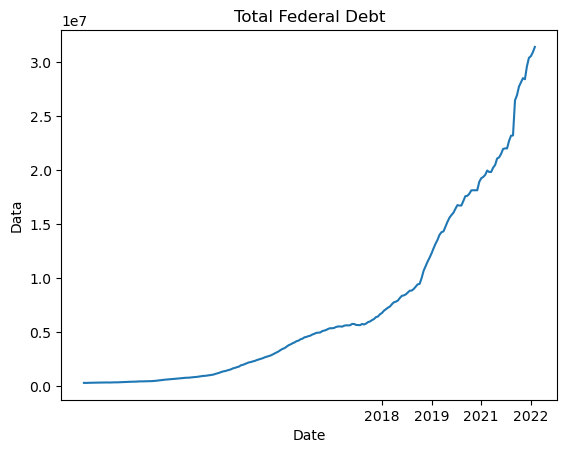

In [8]:
plt.plot(date_2, data_2)
plt.xticks([150, 175, 200, 225], ['2018', '2019', '2021', '2022'])
plt.xlabel('Date')
plt.ylabel('Data')
plt.title('Total Federal Debt')

# Felipe

In [15]:
csvpath = os.path.join("Resources/TDSP.csv") 
 


with open(csvpath, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    print(csvreader)
          
    for row in csvreader:
        print(row)


['DATE', 'TDSP']
['1980-01-01', '10.615740']
['1980-04-01', '10.636900']
['1980-07-01', '10.406386']
['1980-10-01', '10.252837']
['1981-01-01', '10.287516']
['1981-04-01', '10.416878']
['1981-07-01', '10.306743']
['1981-10-01', '10.379325']
['1982-01-01', '10.447258']
['1982-04-01', '10.504029']
['1982-07-01', '10.409941']
['1982-10-01', '10.380410']
['1983-01-01', '10.348922']
['1983-04-01', '10.376333']
['1983-07-01', '10.381299']
['1983-10-01', '10.425534']
['1984-01-01', '10.478991']
['1984-04-01', '10.607963']
['1984-07-01', '10.719033']
['1984-10-01', '10.878463']
['1985-01-01', '11.220536']
['1985-04-01', '11.310744']
['1985-07-01', '11.595799']
['1985-10-01', '11.725570']
['1986-01-01', '11.739687']
['1986-04-01', '11.812105']
['1986-07-01', '11.917140']
['1986-10-01', '12.062025']
['1987-01-01', '11.931285']
['1987-04-01', '12.067256']
['1987-07-01', '11.939659']
['1987-10-01', '11.806446']
['1988-01-01', '11.752855']
['1988-04-01', '11.736396']
['1988-07-01', '11.691190']
['1

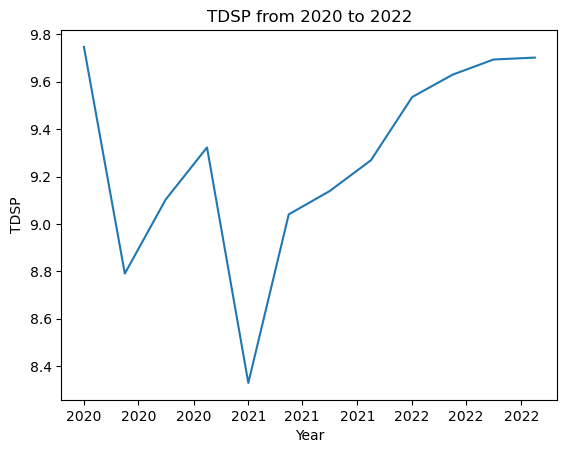

In [20]:
data = pd.read_csv(csvpath)
data['DATE'] = pd.to_datetime(data['DATE'])  


data = data[(data['DATE'].dt.year >= 2020) & (data['DATE'].dt.year <= 2022)]


plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))


plt.plot(data['DATE'], data['TDSP'])
plt.xlabel('Year')
plt.ylabel('TDSP')
plt.title('TDSP from 2020 to 2022')
plt.show()

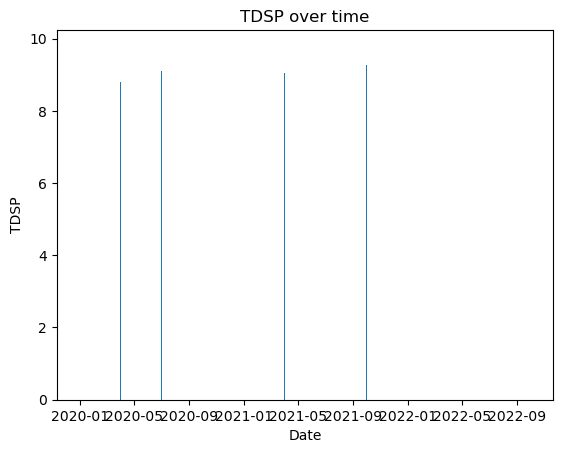

In [21]:
data['DATE'] = pd.to_datetime(data['DATE'])


plt.bar(data['DATE'], data['TDSP'])
plt.xlabel('Date')
plt.ylabel('TDSP')
plt.title('TDSP over time')
plt.show()

# Tyler

In [33]:
series = "GFDEBTN"
url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series}&api_key={api_key}&file_type=json"
percent_change = Path("Resources/TFD_PC.csv")

In [34]:
data_url = requests.get(url).json()
print(data_url)

{'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'observation_start': '1600-01-01', 'observation_end': '9999-12-31', 'units': 'lin', 'output_type': 1, 'file_type': 'json', 'order_by': 'observation_date', 'sort_order': 'asc', 'count': 228, 'offset': 0, 'limit': 100000, 'observations': [{'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'date': '1966-01-01', 'value': '320999'}, {'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'date': '1966-04-01', 'value': '316097'}, {'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'date': '1966-07-01', 'value': '324748'}, {'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'date': '1966-10-01', 'value': '329319'}, {'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'date': '1967-01-01', 'value': '330947'}, {'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'date': '1967-04-01', 'value': '322893'}, {'realtime_start': '2023-05-04', 'realtime_end': '2023-05-04', 'date':

In [35]:
print(json.dumps(data_url, indent=4, sort_keys=True))

{
    "count": 228,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "9999-12-31",
    "observation_start": "1600-01-01",
    "observations": [
        {
            "date": "1966-01-01",
            "realtime_end": "2023-05-04",
            "realtime_start": "2023-05-04",
            "value": "320999"
        },
        {
            "date": "1966-04-01",
            "realtime_end": "2023-05-04",
            "realtime_start": "2023-05-04",
            "value": "316097"
        },
        {
            "date": "1966-07-01",
            "realtime_end": "2023-05-04",
            "realtime_start": "2023-05-04",
            "value": "324748"
        },
        {
            "date": "1966-10-01",
            "realtime_end": "2023-05-04",
            "realtime_start": "2023-05-04",
            "value": "329319"
        },
        {
            "date": "1967-01-01",
            "realtime_end": "2023-05-04",
            "realtime_start": "2023-05-04",
            "value": "

In [36]:
observ = data_url['observations']
print(json.dumps(observ, indent=4, sort_keys=True))

[
    {
        "date": "1966-01-01",
        "realtime_end": "2023-05-04",
        "realtime_start": "2023-05-04",
        "value": "320999"
    },
    {
        "date": "1966-04-01",
        "realtime_end": "2023-05-04",
        "realtime_start": "2023-05-04",
        "value": "316097"
    },
    {
        "date": "1966-07-01",
        "realtime_end": "2023-05-04",
        "realtime_start": "2023-05-04",
        "value": "324748"
    },
    {
        "date": "1966-10-01",
        "realtime_end": "2023-05-04",
        "realtime_start": "2023-05-04",
        "value": "329319"
    },
    {
        "date": "1967-01-01",
        "realtime_end": "2023-05-04",
        "realtime_start": "2023-05-04",
        "value": "330947"
    },
    {
        "date": "1967-04-01",
        "realtime_end": "2023-05-04",
        "realtime_start": "2023-05-04",
        "value": "322893"
    },
    {
        "date": "1967-07-01",
        "realtime_end": "2023-05-04",
        "realtime_start": "2023-05-04",
  

In [37]:
df_observ = pd.DataFrame(observ)
df_final_data = df_observ.drop(columns=["realtime_start", "realtime_end"])
formatted_observ = pd.to_datetime(df_final_data['date'])
filtered_data= df_final_data[formatted_observ.dt.year >= 2018]
filtered_data['value'] = pd.to_numeric(filtered_data['value'])
filtered_data.head()

,date,value
208,2018-01-01,21089643.0
209,2018-04-01,21195070.0
210,2018-07-01,21516058.0
211,2018-10-01,21974096.0
212,2019-01-01,22027880.0


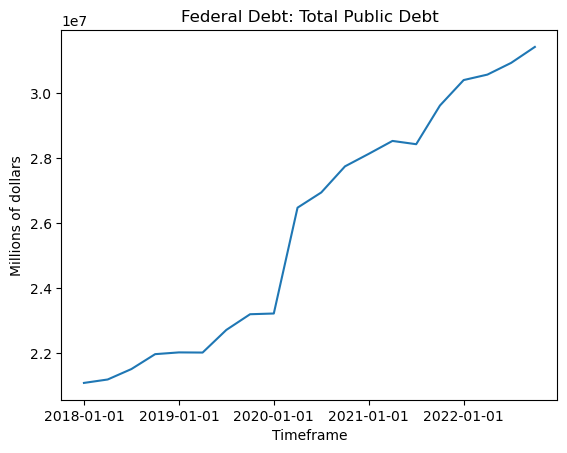

In [38]:
plt.plot(filtered_data['date'], filtered_data['value'])
plt.xlabel('Timeframe')
plt.ylabel('Millions of dollars')
plt.xticks(filtered_data['date'][::len(filtered_data['date'])//5])
plt.title('Federal Debt: Total Public Debt')
plt.show()

In [39]:
print("$22,000,000 is the minimum of the graph")

$22,000,000 is the minimum of the graph


In [40]:
percent_change_csv = pd.read_csv(percent_change)
pc_df = pd.DataFrame(percent_change_csv)
pc_rename_df = pc_df.rename(columns={'GFDEBTN_PC1': '% Change'})
pc_rename_df.head()

,DATE,% Change
0,2018-01-01,6.26422
1,2018-04-01,6.80547
2,2018-07-01,6.27890
3,2018-10-01,7.22865
4,2019-01-01,4.44880


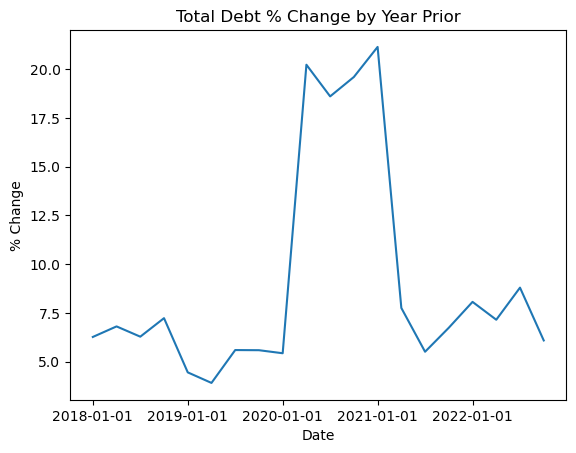

In [42]:
fig, ax = plt.subplots()
x_axis = pc_rename_df['DATE']
y_axis = pc_rename_df['% Change']
ax.plot(x_axis, y_axis)
pc_rename_df['DATE'] = pd.to_datetime(pc_rename_df['DATE'])
ax.set_xticks(x_axis[::len(x_axis)//5])

ax.set_title('Total Debt % Change by Year Prior')
ax.set_xlabel('Date')
ax.set_ylabel('% Change')


plt.show()

In [43]:
percent_average = np.mean(pc_rename_df)
percent_average

% Change    9.059084
dtype: float64